## Home work 7
Name : Ramya Gopinath

USC ID : 4595082262

Github username : ramyagopinath08

In [19]:
#general import statements 
import pandas as pd
import numpy as np
import math

#import statements for SVC, GridSearchCV and RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import hamming_loss,accuracy_score

#import statements for make pipeline, data standardization, Linear SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#import statements for SMOTE and imbalance pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

#import statements for K Means 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [20]:
import warnings

warnings.filterwarnings("ignore")

**(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data
randomly as the training set.**

In [21]:
#read the Frogs Data
df = pd.read_csv("../Data/Frogs_MFCCs.csv")
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [22]:
#Divide the data into train and test
x = df.iloc[:,:-4]
y = df.iloc[:,-4:-1]

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

**(b) Each instance has three labels: Families, Genus, and Species. Each of the labels
has multiple classes. We wish to solve a multi-class and multi-label problem.
One of the most important approaches to multi-label classification is to train a
classifier for each label (binary relevance). We first try this approach:**

**i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.**

Reference : https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

Exact Match : This is noting but Accuracy score. This is the subset accuracy where the predicted set of the labels exactly match the true set of labels. 

Hamming loss : On an average, the class label is incorrectly predicted. This is noting but the fraction of the wrong labels to the total number of labels.

Hamming score : 1 - hamming loss (This is noting but the class labels that is correctly predicted)

In [23]:
def haming_loss_function(y_true, y_predict):
    wrong_predict = 0
    N = len(y_true)
    L = len(y_true.columns)

    for col in y_true.columns:
        for row in range(len(y_true)):
            if y_predict.iloc[row][col] != y_true.iloc[row][col]:
                wrong_predict += 1

    Hloss_score = wrong_predict/ (N*L)
    
    return Hloss_score

In [24]:
def exact_match_function(y_true, y_predict):
    exact_match_value = np.all(y_test.reset_index(drop=True) == y_predict.reset_index(drop=True), axis =1).mean()
    return exact_match_value

**ii. Train a SVM for each of the labels, using Gaussian kernels and one versus
all classifiers. Determine the weight of the SVM penalty and the width of
the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try
to solve the problem with both standardized 2 and raw attributes and report
the results.**

**Classification for Family**

In [25]:
#C and gamma values as given in the footnote of the assignment 
c_value = np.logspace(-3,6,10)
gamma_value = np.linspace(0.1,2.0,10)

#parameters
param_grid_value = dict(gamma=gamma_value, C=c_value)

#cross validation and SVC classifier
cv_rkf = RepeatedKFold(n_splits=10, n_repeats=2)
svm_classifer = SVC(kernel='rbf',decision_function_shape='ovr')

#GridSearch CV 
grid = GridSearchCV(estimator=svm_classifer, cv=cv_rkf,param_grid=param_grid_value, n_jobs=-1)
grid.fit(x_train,y_train.iloc[:,:1].values.ravel())

#Best parameter, score and best estimator
best_parameter_family = grid.best_params_
best_score_family = grid.best_score_
best_estimator_family = grid.best_estimator_

#printng the best estimator
print(f"The best parameters for family : {best_parameter_family}")
print(f"The best score is : {best_score_family}")

#Prediction
y_predict_family = best_estimator_family.predict(x_test)

The best parameters for family : {'C': 10.0, 'gamma': 2.0}
The best score is : 0.9945389172899114


**Classification for Genus**

In [27]:
#C and gamma values as given in the footnote of the assignment
c_value = np.logspace(-3,6,10)
gamma_value = np.linspace(0.1,2.0,10)

#parameters
param_grid_value = dict(gamma=gamma_value, C=c_value)

#cross validation and SVC classifier
cv_rkf = RepeatedKFold(n_splits=10, n_repeats=2)
svm_classifer = SVC(kernel='rbf',decision_function_shape='ovr')

#GridSearch CV
grid = GridSearchCV(estimator=svm_classifer, cv=cv_rkf,param_grid=param_grid_value, n_jobs=-1)
grid.fit(x_train,y_train.iloc[:,1:2].values.ravel())
 
#Best parameter, score and best estimator
best_parameter_genus = grid.best_params_
best_score_genus = grid.best_score_
best_estimator_genus = grid.best_estimator_

#printng the best estimator
print(f"The best parameters for genus : {best_parameter_genus}")
print(f"The best score is : {best_score_genus}")

#Prediction
y_predict_genus = best_estimator_genus.predict(x_test)

The best parameters for genus : {'C': 10.0, 'gamma': 0.9444444444444444}
The best score is : 0.99205777241314


**Classification for Species**

In [29]:
#C and gamma values as given in the footnote of the assignment
c_value = np.logspace(-3,6,10)
gamma_value = np.linspace(0.1,2.0,10)

#parameters
param_grid_value = dict(gamma=gamma_value, C=c_value)

#cross validation and SVC classifier
cv_rkf = RepeatedKFold(n_splits=10, n_repeats=2)
svm_classifer = SVC(kernel='rbf',decision_function_shape='ovr')

#GridSearch CV
grid = GridSearchCV(estimator=svm_classifer, cv=cv_rkf,param_grid=param_grid_value, n_jobs=-1)
grid.fit(x_train,y_train.iloc[:,2:3].values.ravel())

#Best parameter, score and best estimator
best_parameter_species = grid.best_params_
best_score_species = grid.best_score_
best_estimator_species = grid.best_estimator_
 
#printng the best estimator
print(f"The best parameters for speices : {best_parameter_species}")
print(f"The best score is : {best_score_species}")

#Prediction
y_predict_species = best_estimator_species.predict(x_test)

The best parameters for speices : {'C': 10.0, 'gamma': 0.9444444444444444}
The best score is : 0.9926532077377008


In [31]:
combined_y_pre = pd.DataFrame()
combined_y_pre['Family'] = y_predict_family
combined_y_pre['Genus'] = y_predict_genus
combined_y_pre['Species'] = y_predict_species

In [33]:
hamming_loss_smote = haming_loss_function(y_test,combined_y_pre)
print(f"Hamming Loss for L1 classifer : {hamming_loss_smote}")
print("******************************************************************")
exact_match_val = exact_match_function(y_test,combined_y_pre)
print(f"Exact match score for L1 classifier: {exact_match_val}")

Hamming Loss for L1 classifer : 0.01281457464875714
******************************************************************
Exact match score for L1 classifier: 0.9819360815192218


**iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4
the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.**

In [34]:
#make a general pipeline for all the 3 classifiers

#Standardize the data
std_scalar = StandardScaler()

#Linear SVC L1 penalized 
L1_SVC = LinearSVC(penalty='l1',dual=False, max_iter=10000)

#cross validation
cv_L1_SVC = RepeatedKFold(n_splits=10, n_repeats=2)

#c parameter
c_linear_svc = np.logspace(-3,6,10)
parameters = {'linearsvc__C' : c_linear_svc}

pipeline_svc_L1 = make_pipeline(std_scalar,L1_SVC)

**Classification for Family**

In [35]:
#GridSearch CV
grid_L1_family = GridSearchCV(estimator=pipeline_svc_L1,param_grid=parameters,cv=cv_L1_SVC, n_jobs=-1)
grid_L1_family.fit(x_train,y_train.iloc[:,:1].values.ravel())

#Best parameter, score and best estimator
best_params_L1_family = grid_L1_family.best_params_
best_score_L1_family = grid_L1_family.best_score_
best_estimator_L1_family = grid_L1_family.best_estimator_

print(f"The best parameters for family : {best_params_L1_family}")
print(f"The best score is : {best_score_L1_family}")

#Prediction
y_predict_family_L1 = best_estimator_L1_family.predict(x_test)

The best parameters for family : {'linearsvc__C': 1000.0}
The best score is : 0.939439158698602


**Classification for Genus**

In [37]:
#GridSearch CV
grid_L1_genus = GridSearchCV(estimator=pipeline_svc_L1,param_grid=parameters,cv=cv_L1_SVC,n_jobs=-1)
grid_L1_genus.fit(x_train,y_train.iloc[:,1:2].values.ravel())

#Best parameter, score and best estimator
best_params_L1_genus = grid_L1_genus.best_params_
best_score_L1_genus = grid_L1_genus.best_score_
best_estimator_L1_genus = grid_L1_genus.best_estimator_

print(f"The best parameters for genus : {best_params_L1_genus}")
print(f"The best score is : {best_score_L1_genus}")

#Prediction
y_predict_genus_L1 = best_estimator_L1_genus.predict(x_test)

The best parameters for genus : {'linearsvc__C': 1.0}
The best score is : 0.9558202373063207


**Classification for Species**

In [39]:
#GridSearch CV
grid_L1_species = GridSearchCV(estimator=pipeline_svc_L1,param_grid=parameters,cv=cv_L1_SVC,n_jobs=-1)
grid_L1_species.fit(x_train,y_train.iloc[:,2:3].values.ravel())

#Best parameter, score and best estimator
best_params_L1_species = grid_L1_species.best_params_
best_score_L1_species = grid_L1_species.best_score_
best_estimator_L1_species = grid_L1_species.best_estimator_

print(f"The best parameters for speices : {best_params_L1_species}")
print(f"The best score is : {best_score_L1_species}")

#Prediction
y_predict_species_L1 = best_estimator_L1_species.predict(x_test)

The best parameters for speices : {'linearsvc__C': 1.0}
The best score is : 0.9599902568714695


In [41]:
combined_y_pre_L1 = pd.DataFrame()
combined_y_pre_L1['Family'] = y_predict_family_L1
combined_y_pre_L1['Genus'] = y_predict_genus_L1
combined_y_pre_L1['Species'] = y_predict_species_L1

In [42]:
hamming_loss_smote = haming_loss_function(y_test,combined_y_pre_L1)
print(f"Hamming Loss for L1 classifer : {hamming_loss_smote}")
print("******************************************************************")
exact_match_val = exact_match_function(y_test,combined_y_pre_L1)
print(f"Exact match score for L1 classifier: {exact_match_val}")

Hamming Loss for L1 classifer : 0.060985023930832175
******************************************************************
Exact match score for L1 classifier: 0.905511811023622


**iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained.**

In [43]:
#make a general pipeline for all 3 classifiers

#Standardize data
std_scalar = StandardScaler()

#SMOTE
smote_L1 = SMOTE()

#Linear SVC
L1_SVC_smote = LinearSVC(penalty='l1',dual=False, max_iter=10000)

#Cross Validation
cv_L1_SVC_smote = RepeatedKFold(n_splits=10, n_repeats=2)

#C parameter
c_linear_svc = np.logspace(-3,6,10)
parameters = {'svc_classifer__C' : c_linear_svc}

#pipeline
pipeline_svc_L1_smote = Pipeline(steps = [['std_scalar' , std_scalar],['smote', smote_L1],['svc_classifer' , L1_SVC_smote]])

**Classification for Family**

In [44]:
#GridSearch CV
grid_L1_family_smote = GridSearchCV(estimator=pipeline_svc_L1_smote,param_grid=parameters,cv=cv_L1_SVC_smote, n_jobs=-1)
grid_L1_family_smote.fit(x_train,y_train.iloc[:,:1].values.ravel())

#Best parameter, score and best estimator
best_params_L1_family_smote = grid_L1_family_smote.best_params_
best_score_L1_family_smote = grid_L1_family_smote.best_score_
best_estimator_L1_family_smote = grid_L1_family_smote.best_estimator_

print(best_params_L1_family_smote)
print(best_score_L1_family_smote)

#Prediction
y_predict_family_L1_smote = best_estimator_L1_family_smote.predict(x_test)

{'svc_classifer__C': 10000.0}
0.9271286960775035


**Classification for Genus**

In [46]:
#GridSearch CV
grid_L1_genus_smote = GridSearchCV(estimator=pipeline_svc_L1_smote,param_grid=parameters,cv=cv_L1_SVC_smote,n_jobs=-1)
grid_L1_genus_smote.fit(x_train,y_train.iloc[:,1:2].values.ravel())

#Best parameter, score and best estimator
best_params_L1_genus_smote = grid_L1_genus_smote.best_params_
best_score_L1_genus_smote = grid_L1_genus_smote.best_score_
best_estimator_L1_genus_smote = grid_L1_genus_smote.best_estimator_

print(best_params_L1_genus_smote)
print(best_score_L1_genus_smote)

#Prediction
y_predict_genus_L1_smote = best_estimator_L1_genus_smote.predict(x_test)

{'svc_classifer__C': 0.1}
0.9238475890687621


**Classification for Species**

In [48]:
#GridSearch CV
grid_L1_species_smote = GridSearchCV(estimator=pipeline_svc_L1_smote,param_grid=parameters,cv=cv_L1_SVC_smote,n_jobs=-1)
grid_L1_species_smote.fit(x_train,y_train.iloc[:,2:3].values.ravel())

#Best parameter, score and best estimator
best_params_L1_species_smote = grid_L1_species_smote.best_params_
best_score_L1_species_smote = grid_L1_species_smote.best_score_
best_estimator_L1_species_smote = grid_L1_species_smote.best_estimator_

print(best_params_L1_species_smote)
print(best_score_L1_species_smote)

#Prediction
y_predict_species_L1_smote = best_estimator_L1_species_smote.predict(x_test)

{'svc_classifer__C': 0.1}
0.9574073416643


In [50]:
combined_y_predict = pd.DataFrame()
combined_y_predict['Family'] = y_predict_family_L1_smote
combined_y_predict['Genus'] = y_predict_genus_L1_smote
combined_y_predict['Species'] = y_predict_species_L1_smote
# combined_y_predict

In [51]:
hamming_loss_smote = haming_loss_function(y_test,combined_y_predict)
print(f"Hamming Loss for L1 smote classifer : {hamming_loss_smote}")
print("******************************************************************")
exact_match_val = exact_match_function(y_test,combined_y_predict)
print(f"Exact match score for L1 smote classifier: {exact_match_val}")

Hamming Loss for L1 smote classifer : 0.07426277597653234
******************************************************************
Exact match score for L1 smote classifier: 0.8628994905048634


**2. K-Means Clustering on a Multi-Class and Multi-Label Data Set**

**Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.**

**(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split
the data into train and test, as we are not performing supervised learning in this
exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods
provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any
other method you know.**

**(b) In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.**

**(c) Now for each cluster you have a majority label triplet (family, genus, species).
Calculate the average Hamming distance, Hamming score, and Hamming loss5
between the true labels and the labels assigned by clusters.**

In [52]:
#Findind the optimal k using silhouette values
sample_weight = []
silhouette_values = []
K_range = range(2,51,1)
for k in K_range:
    k_means = KMeans(n_clusters=k, random_state=40)
    k_means.fit(df.iloc[:,:-4])
    
    sample_weight.append(k_means.inertia_)
    label = k_means.labels_
    silhouette_values.append(silhouette_score(df.iloc[:,:-4],label))

The optimal value of k is : 4


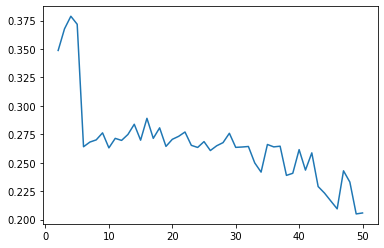

In [53]:
optimal_k = silhouette_values.index(max(silhouette_values)) + 2
print(f"The optimal value of k is : {optimal_k}")
plt.plot(K_range,silhouette_values)
plt.show()

From the above we get the optimal value of k. This way we find the optimal k in every Monte Carlo run to find the avg and std deviation for all the runs.

In [54]:
#Monte carlo simulation 

x_kmean = df.iloc[:,:-4]
y_kmean = df.iloc[:,-4:-1]

hamming_loss_values = []
hamming_score_values = []
hamming_distance_values = []

for i in range(0,50):  
    silhouette_values = []
    K_range = range(2,51,1)
    for k in K_range:
        k_means = KMeans(n_clusters=k, random_state= np.random.randint(i+2,i+2*500))
        k_means.fit(x_kmean)

        label = k_means.labels_
        silhouette_values.append(silhouette_score(x_kmean,label))
        
    optimal_k = silhouette_values.index(max(silhouette_values)) + 2
#     print(f"Optimal K value : {optimal_k}")
    
    #Training the model with optimal K
    K_means_optimal = KMeans(n_clusters=optimal_k)
    K_means_optimal.fit(x_kmean)
    
    y_kmean['Cluster'] = K_means_optimal.labels_
    
    new_predit = pd.DataFrame()
    
    #Calcualte the majority class for each cluster(for Family, Genus, Species) and assign it
    for cluster in range(0,optimal_k):
        data = y_kmean[y_kmean['Cluster'] == cluster]
        
        #find the majority class in family, genus and species in the cluster
        family = data['Family'].value_counts().to_frame().idxmax()
        genus = data['Genus'].value_counts().to_frame().idxmax()
        species = data['Species'].value_counts().to_frame().idxmax()
        
        #new predicted class triplet 
        new_predit['Family'] = np.where(y_kmean['Cluster'] == cluster, family, y_kmean['Family'])
        new_predit['Genus'] = np.where(y_kmean['Cluster'] == cluster, genus, y_kmean['Genus'])
        new_predit['Species'] = np.where(y_kmean['Cluster'] == cluster, species, y_kmean['Species'])
        
    
    #Hamming loss obtained from the self defined fucntion 
    hammingLoss_pred = haming_loss_function(y_kmean.iloc[:,:-1],new_predit)
    
    hamming_loss_values.append(hammingLoss_pred)
    #hamming score is 1-hamming loss
    hamming_score_values.append(1-hammingLoss_pred)
    #hamming distance is wrong prediction divided by number of sample(N) 
    hamming_distance_values.append(hammingLoss_pred * 3)
    
HL_avg = np.mean(hamming_loss_values)
HL_std = np.std(hamming_loss_values)

HS_avg = np.mean(hamming_score_values)
HS_std = np.std(hamming_score_values)

HD_avg = np.mean(hamming_distance_values)
HD_std = np.std(hamming_distance_values)

print(f"The average of hamming loss : {HL_avg}")
print(f"The standard deviation of hamming loss : {HL_std}")
print("*****************************************************************")
print(f"The average of hamming score : {HS_avg}")
print(f"The standard deviation of hamming score : {HS_std}")
print("*****************************************************************")
print(f"The average of hamming distances : {HD_avg}")
print(f"The standard deviation of hamming distances : {HD_std}")

The average of hamming loss : 0.05795506138522121
The standard deviation of hamming loss : 0.04408242397059741
*****************************************************************
The average of hamming score : 0.9420449386147787
The standard deviation of hamming score : 0.04408242397059741
*****************************************************************
The average of hamming distances : 0.17386518415566368
The standard deviation of hamming distances : 0.13224727191179222


## 3. ISLR 12.6.2

**12.6.2. Suppose that we have four observations, for which we compute a
dissimilarity matrix, given by**

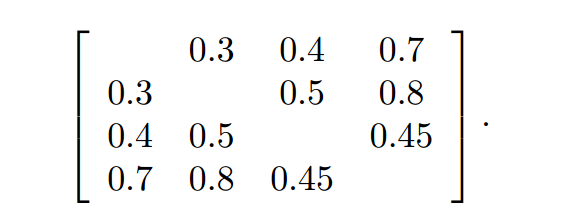

**For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth
observations is 0.8.**

**(a) On the basis of this dissimilarity matrix, sketch the dendrogram
that results from hierarchically clustering these four observa￾tions using complete linkage. Be sure to indicate on the plot the
height at which each fusion occurs, as well as the observations
corresponding to each leaf in the dendrogram.**

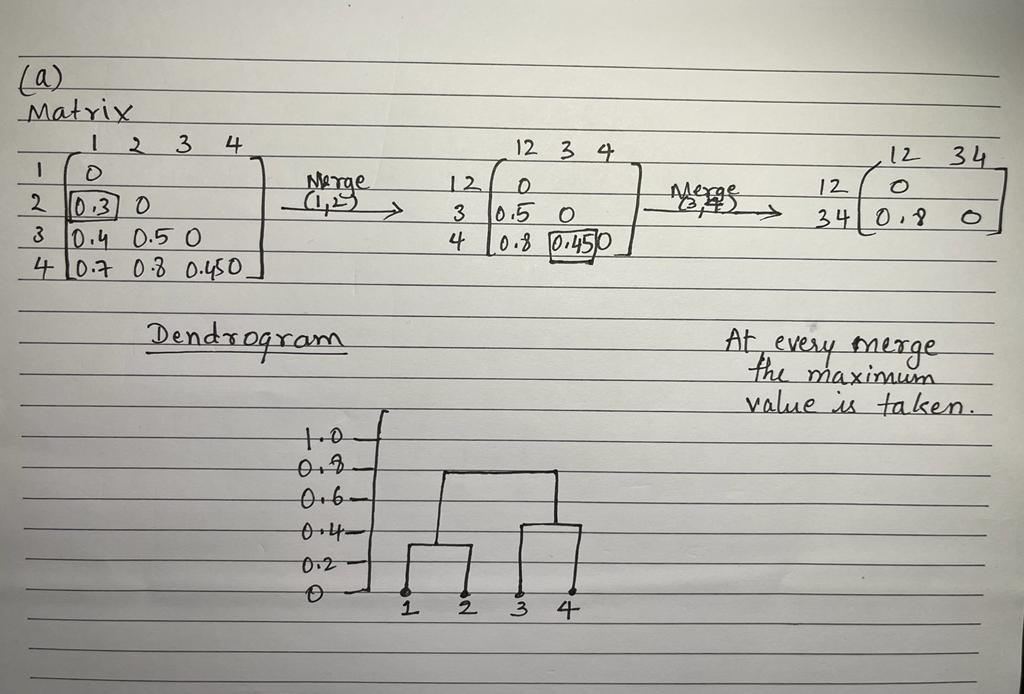

**(b) Repeat (a), this time using single linkage clustering.**

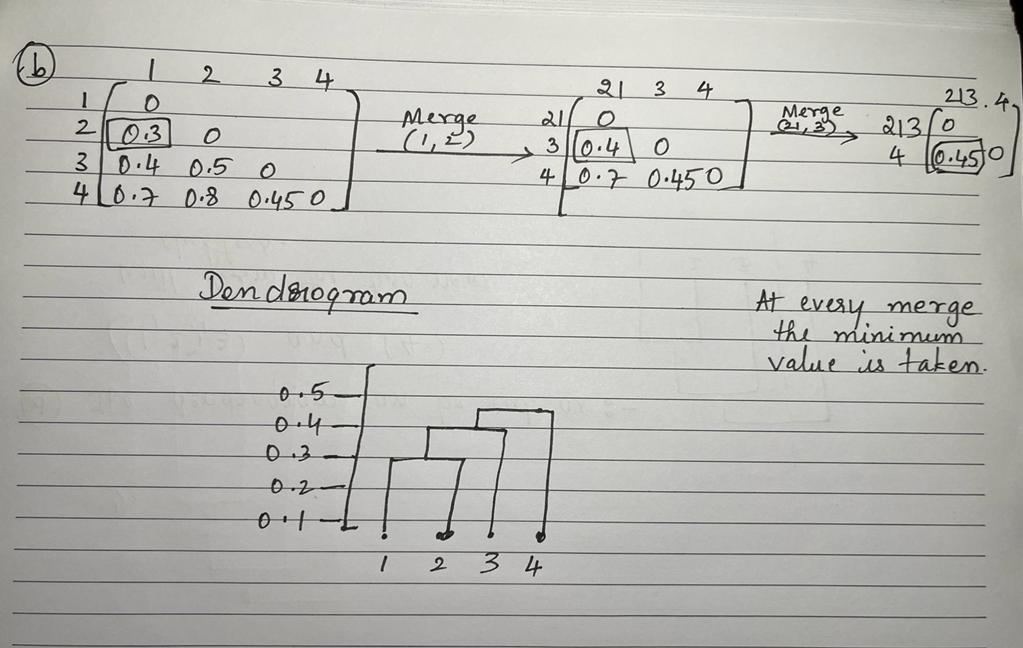

**(c) Suppose that we cut the dendrogram obtained in (a) such that
two clusters result. Which observations are in each cluster?**

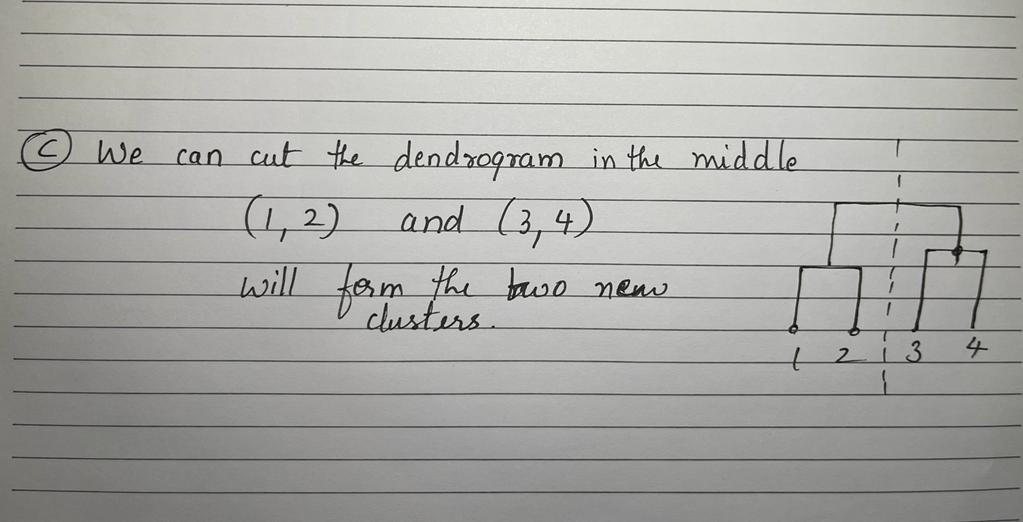

**(d) Suppose that we cut the dendrogram obtained in (b) such that
two clusters result. Which observations are in each cluster?**

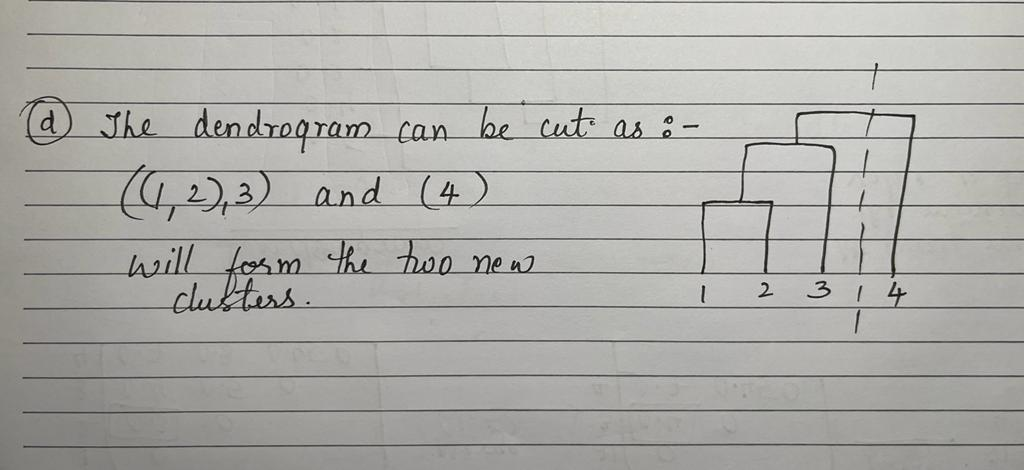

**(e) It is mentioned in the chapter that at each fusion in the den￾drogram, the position of the two clusters being fused can be
swapped without changing the meaning of the dendrogram. Draw
a dendrogram that is equivalent to the dendrogram in (a), for
which two or more of the leaves are repositioned, but for which
the meaning of the dendrogram is the same.**

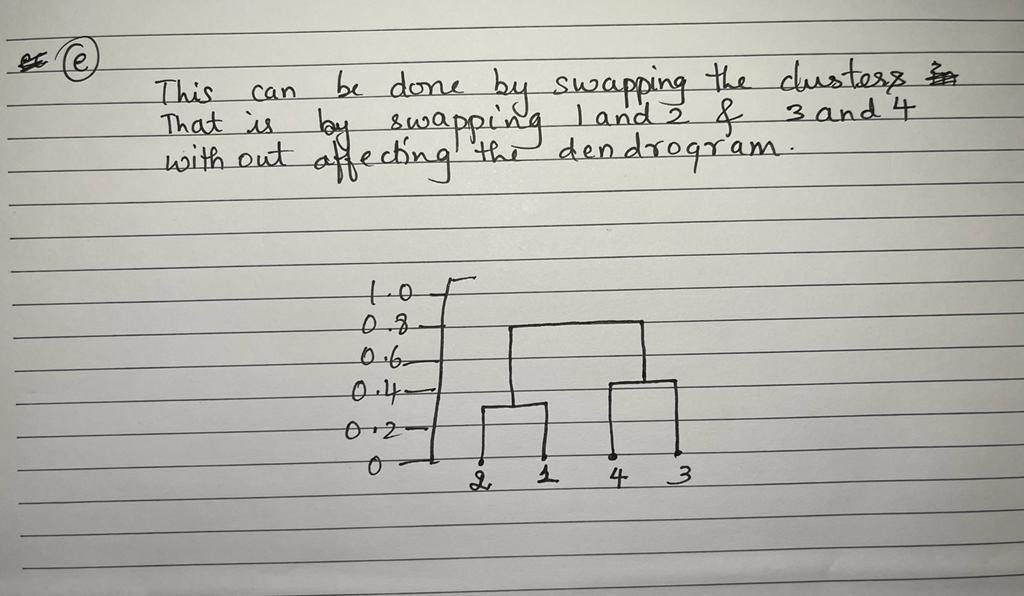

**References**

1) https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html <br>
2) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html <br>
3) https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html <br>
4) https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html <br>
5) https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html <br>
6) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html <br>
7) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html <br>
8) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html <br>
9) https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html <br>
10) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html <br>
11) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html <br>
12) https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
13) https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>